In [1]:
# set important data in the config file first!
source("config.R")
source("../../extra-R-functions.R")

v Reading from Status of mouse sequencing.

v Range ''All founder files''.

v Reading from Status of mouse sequencing.

v Range ''All Fx files''.


Attaching package: 'tidytable'


The following objects are masked from 'package:stats':

    dt, filter, lag


The following object is masked from 'package:base':

    %in%




In [2]:
library(stringr)
library(ggplot2)

In [3]:
library(naturalsort)

In [4]:
onlyGT=function(x)
    {
    temp = strsplit(as.character(x), split = ":", fixed = TRUE)[[1]][1]
    if(temp=="./.")
        {
        return("No call")
    }
    if(substr(temp, 1,1) == substr(temp,3,3))
        {
        return("Homozygous")
    }
    if(substr(temp, 1,1) != substr(temp,3,3) & substr(temp,2,2)=="/")
        {
        return("Unphased, Het")
    }
    if(substr(temp, 2,2)=="|")
        {
        return("Phased")
    } 
    return("Unclear")
}

In [7]:
files=paste0(folder_for_sequences,"Founders.filtered.var.vcf.gz")

In [8]:
results=list()

In [9]:
for(f in files){
    vcf=fread(cmd=paste0("zcat ",f," | grep -v ^## | cut -f 1,10-"), header=TRUE, sep="\t")

    for(j in 2:ncol(vcf)){
        vcf <- vcf %>% 
          mutate(!!names(vcf)[j] := pull(select(.df = vcf, all_of(j))) %>% map_chr(onlyGT))
    }

    head(vcf)

    gts_long=vcf%>%pivot_longer(2:ncol(vcf))
    colnames(gts_long)[1]="chr"



    gts_long=tidytable::group_by(gts_long, chr, name, value)%>%summarise(n=n())

    results[[f]]=gts_long
    
}

In [10]:
# excuse the legacy code

results_df=results[[f]]

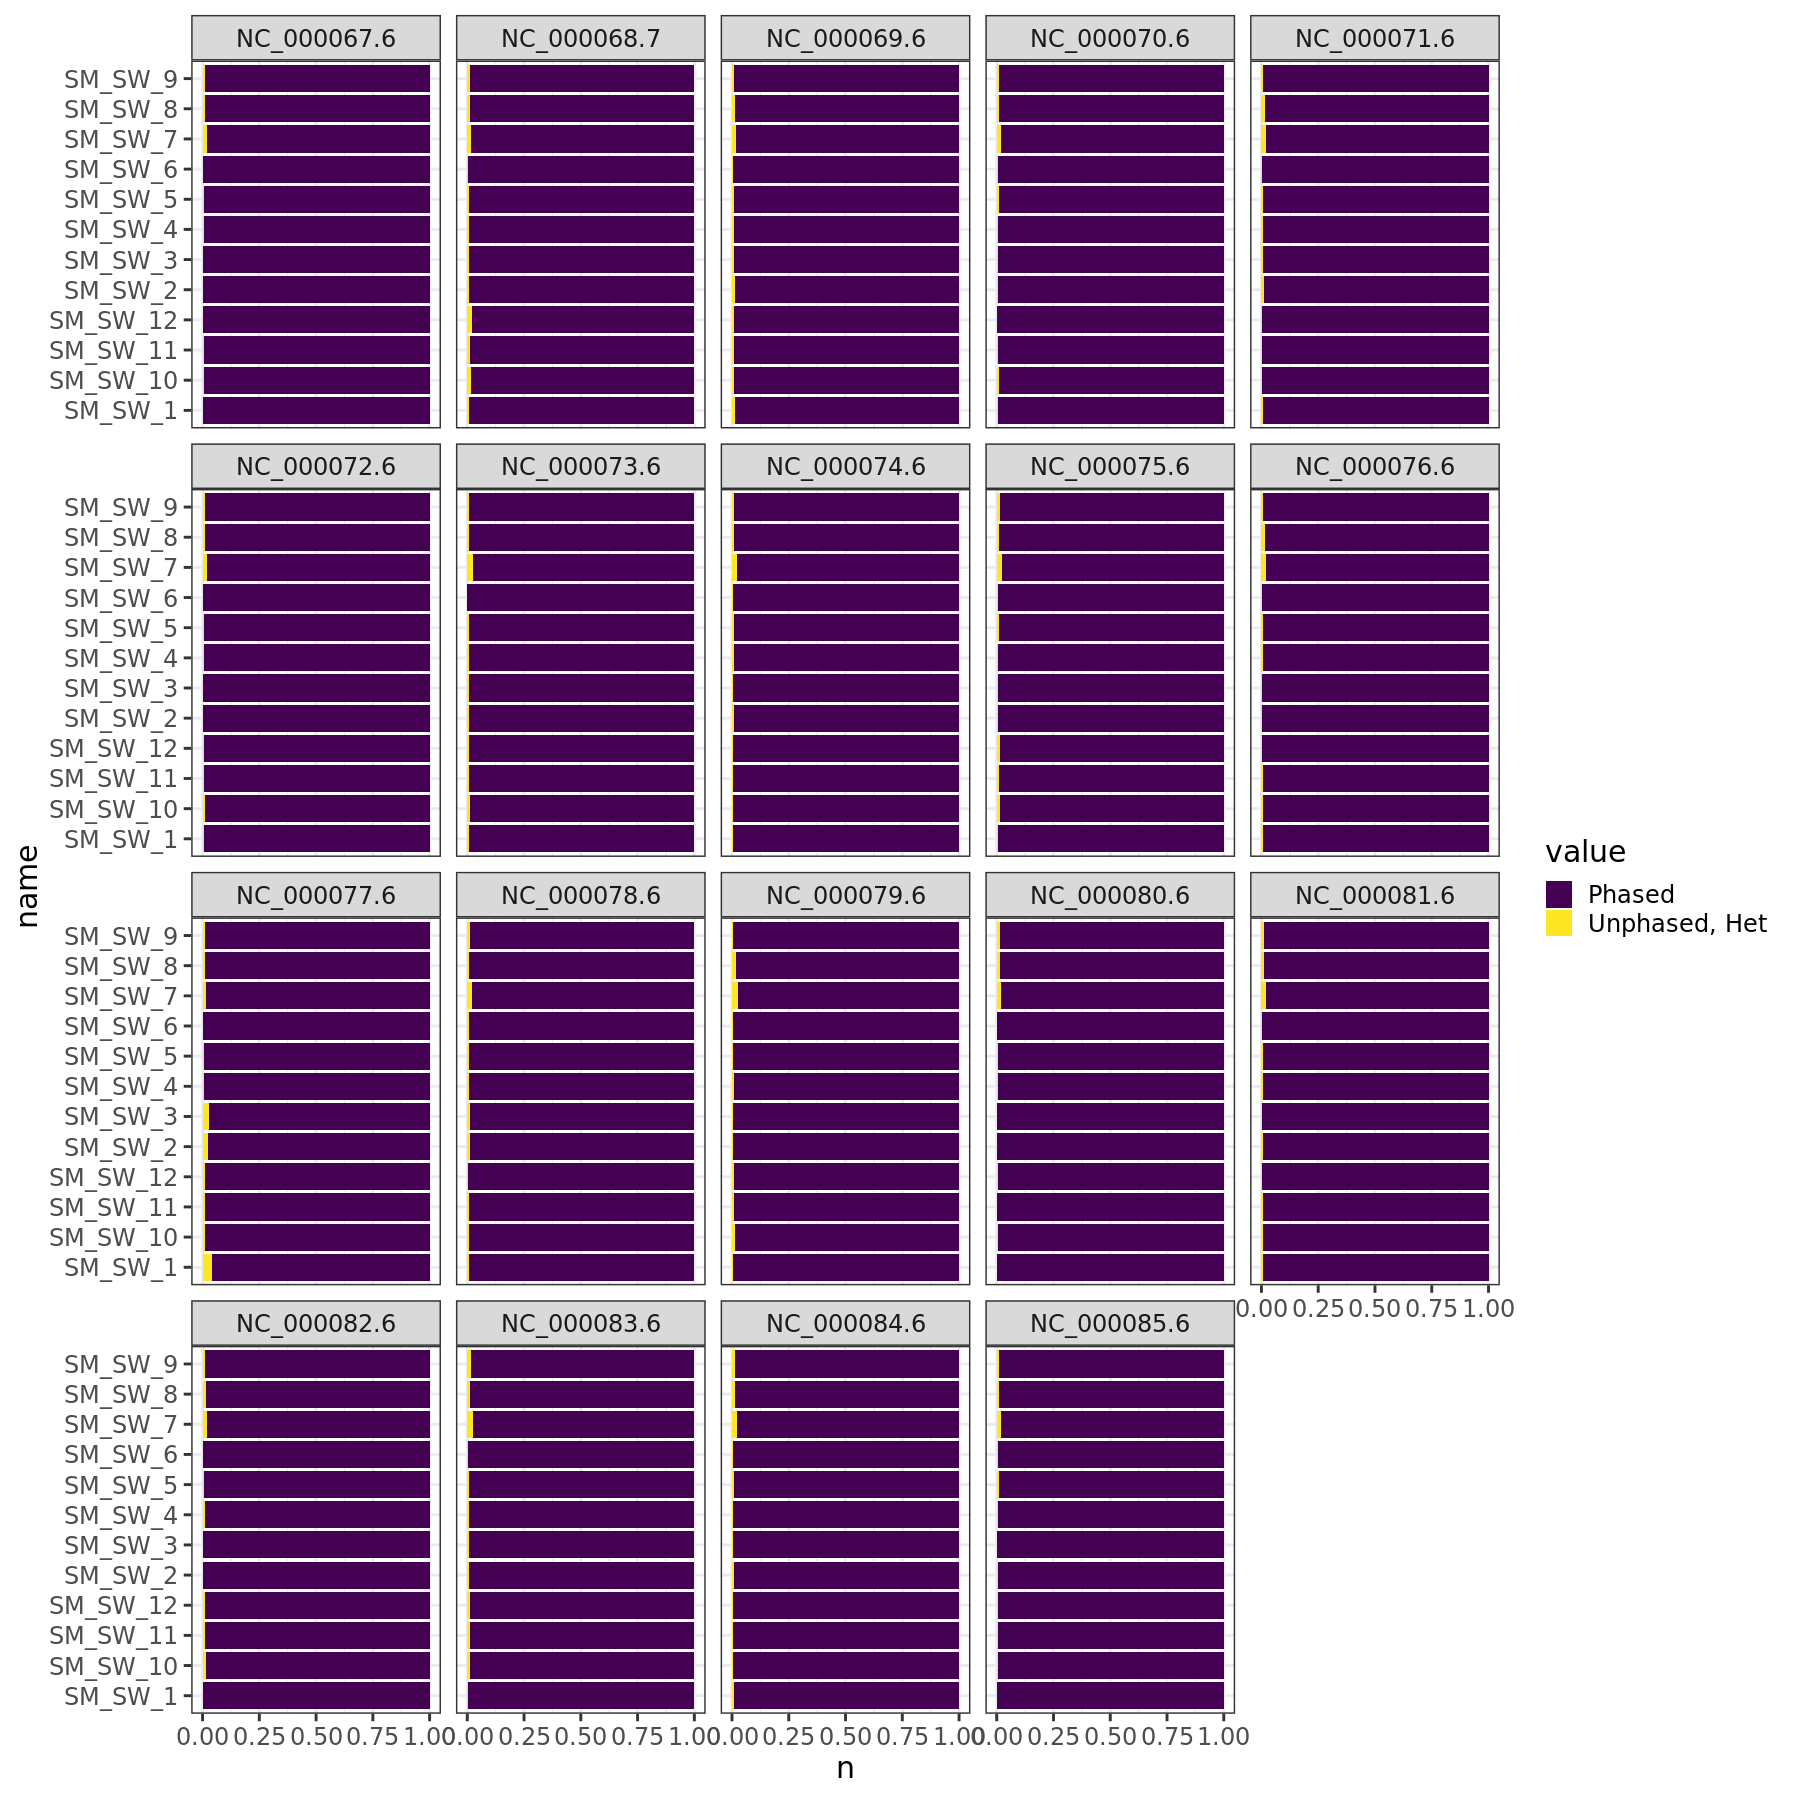

In [11]:
options(repr.plot.width=15, repr.plot.height=15)

# only showing non-homozygous results
# keep in mind that there has been zero filtering so far, 
# so unphased can be due to lack of genotypes

ggplot(filter(results_df,value!="Homozygous"), aes(name,n,fill=value))+
geom_col(position="fill")+facet_wrap(~chr)+scale_fill_viridis_d()+theme_bw(18)+
coord_flip()